In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [2]:
registers = list()

with open('./data/2015_2016.csv', 'r') as f:
    id_causa = ''
    causa = ''
    genero = ''
    for line in f:
        if line[0] != ' ':
            id_causa = line.split(' ')[0]
            causa = line.split(';')[0]
        else:
            line = line.lstrip()
            if line.split(';')[0] in ['Hombres', 'Mujeres']:
                genero = line.split(';')[0]
            else: 
                items = line.split(';')
                
                registers.append({
                    'id_causa': id_causa,
                    'causa': causa,
                    'genero': genero,
                    'rango_edad': items[0],
                    'año': 2016,
                    'valor': float(items[1])
                })
                
                registers.append({
                    'id_causa': id_causa,
                    'causa': causa,
                    'genero': genero,
                    'rango_edad': items[0],
                    'año': 2015,
                    'valor': float(items[2])
                })

df = pd.DataFrame(registers)
df_censo = pd.read_csv('./data/censo2015_2016.csv', sep=';')
df_censo['total'] = (df_censo['2016'] + df_censo['2015'])/2

http://www.ine.es/jaxiT3/Tabla.htm?t=7947

# Estudio, para pasar el rato, de homicidios en España en 2015-2016

**Fuente de los datos**: Instituto Nacional de Estadística
  - Datos de Muertes: http://www.ine.es/jaxiT3/Tabla.htm?t=7947
  - Datos de Censo: http://www.ine.es/jaxi/Tabla.htm?path=/t20/e245/p08/l0/&file=02002.px
  
Se trata de analizar las causas de fallecimiento en España, centrándonos en los homicidios y, en este caso concreto, las diferencias por edades y entre hombres y mujeres

# Muertes totales en España en 2015-2016

Primero pintamos el número de muertes en España en el período 2015-2016, clasificado por causa de la muerte.

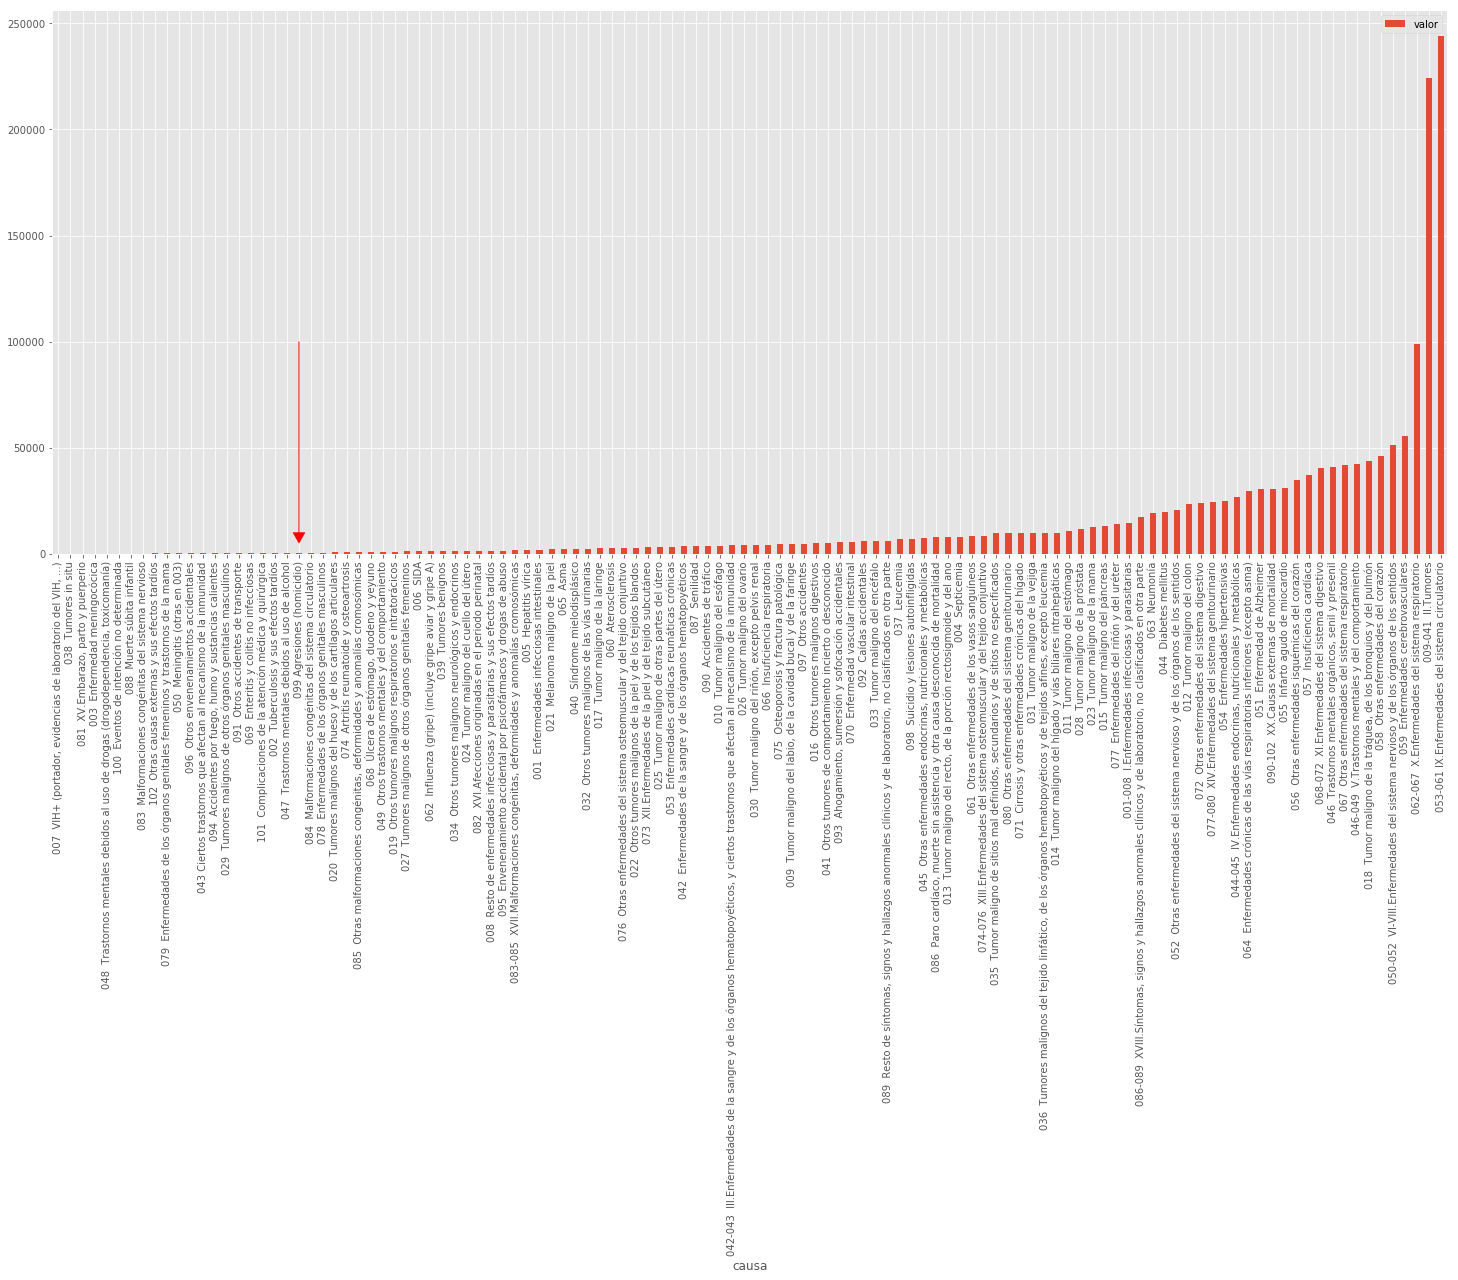

In [3]:
ax = df.groupby('causa').agg({'valor': sum}).sort_values('valor').plot.bar(figsize=(25, 10))
ax.arrow(20, 100000, 0, -90000, head_width=1, head_length=5000, fc='r', ec='r')

In [4]:
df.groupby('causa').agg({'valor': sum}).loc["099 Agresiones (homicidio)"] / df['valor'].sum()

valor    0.000341
Name: 099 Agresiones (homicidio), dtype: float64

Se puede observar que el homicidio ocupa la posición 21 de las causas de muerte en España, significativamente más pequeño que el resto. De hecho, representa el **0.0341 %** de las muertes anuales en España

# Muertes por Homicidio en España en el período 2015-2016

In [5]:
df_homicidio = df[df['id_causa'] == '099']

## Clasificación por género

Analizamos las muertes violentas por género, de cara a identificar algún tipo de sesgo.

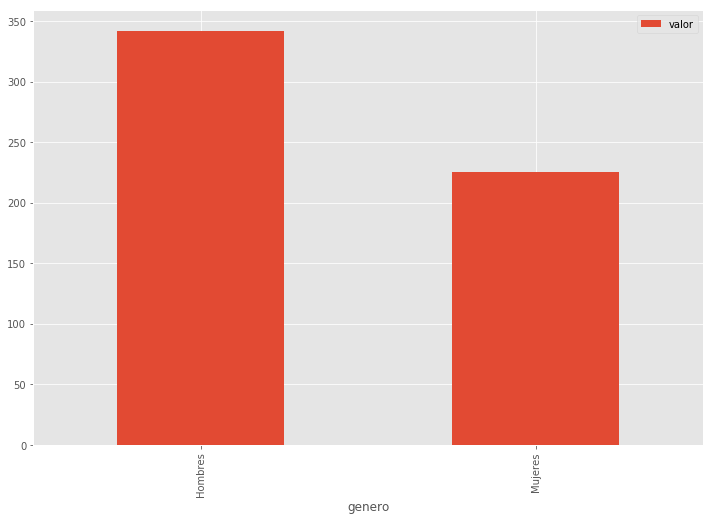

In [6]:
df_homicidio.groupby('genero').agg({'valor': sum}).plot.bar(figsize=(12, 8))

Se puede ver, claramente, que la cantidad de muertes por homicidio en España es mucho mayor en los hombres que en las mujeres

## Clasificación por rango de edad

Observamos la información por rango de edad, tanto en global como separado por hombres y mujeres

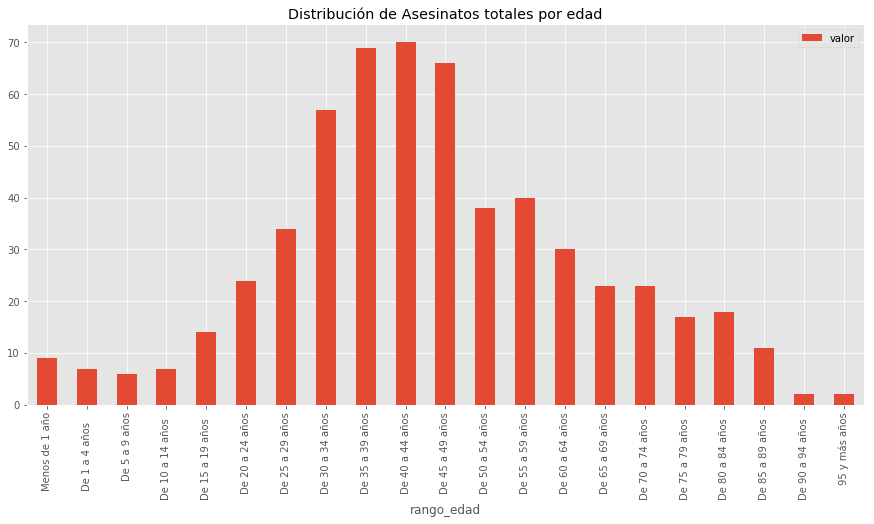

In [7]:
df_homicidio.groupby('rango_edad').agg({'valor': sum}).loc[df_homicidio['rango_edad'].unique()].plot.bar(figsize=(15, 7), title='Distribución de Asesinatos totales por edad')

In [8]:
df_homicidio_grouped = df_homicidio.groupby(['genero', 'rango_edad']).agg({'valor': sum}).reset_index().pivot(index='rango_edad', columns='genero').loc[df_homicidio['rango_edad'].unique()]['valor']

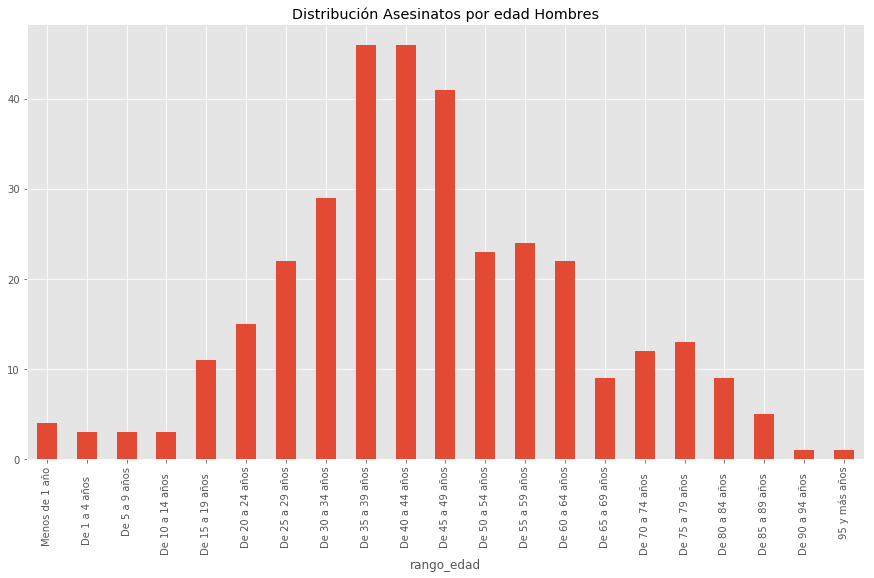

In [9]:
df_homicidio_grouped['Hombres'].plot.bar(figsize=(15, 8), title='Distribución Asesinatos por edad Hombres')

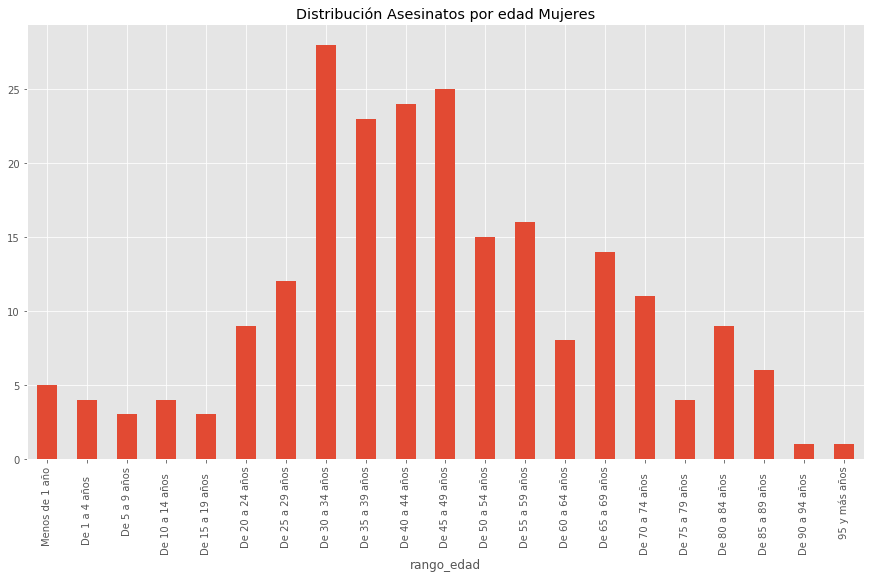

In [10]:
df_homicidio_grouped['Mujeres'].plot.bar(figsize=(15, 8), title='Distribución Asesinatos por edad Mujeres')

En el caso de las mujeres, se observa una frecuencia muy baja en edades inferiores a 20 años, creciendo claramente a partir de los 20, cosa que se puede achacar a la violencia de género en el hogar (esto es aportación mía, ¿eh? que los datos no dicen eso)

# Pirámide Poblacional

Todas las conclusiones a las que hemos llegado antes no tienen sentido sin mirar la pirámide poblacional. Es claro que si ésta pirámide siguiese la misma forma que los asesinatos, al final estaríamos diciendo que es igual de probable que te asesinen siendo joven que mayor, ya que la explicación de la curva la daría la propia pirámide.

Por lo tanto, vamos a analizar esta pirámide para ver si cuadra con las curvas anteriores

In [11]:
df_censo_grouped = df_censo[['genero', 'rango_edad', 'total']].pivot(index='rango_edad', columns='genero').loc[df_censo['rango_edad'].unique()]['total']
df_censo_grouped['total'] = df_censo_grouped['Hombres'] + df_censo_grouped['Mujeres']

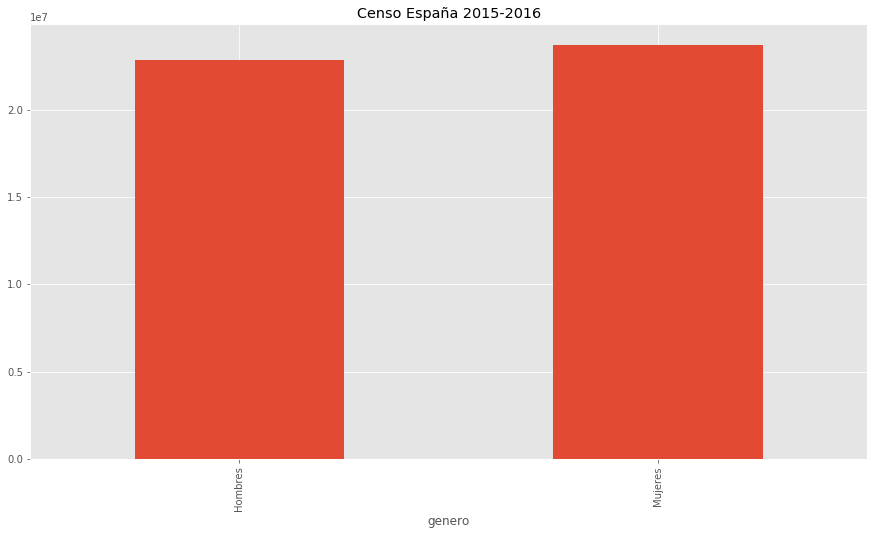

In [12]:
df_censo_grouped[['Hombres', 'Mujeres']].sum().plot.bar(figsize=(15, 8), title='Censo España 2015-2016')

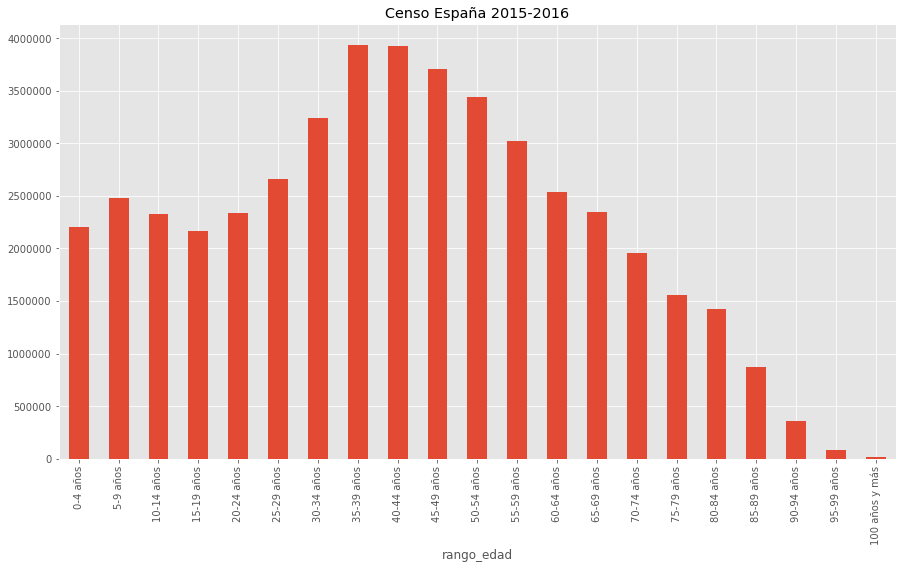

In [13]:
df_censo_grouped['total'].plot.bar(figsize=(15, 8), title='Censo España 2015-2016')

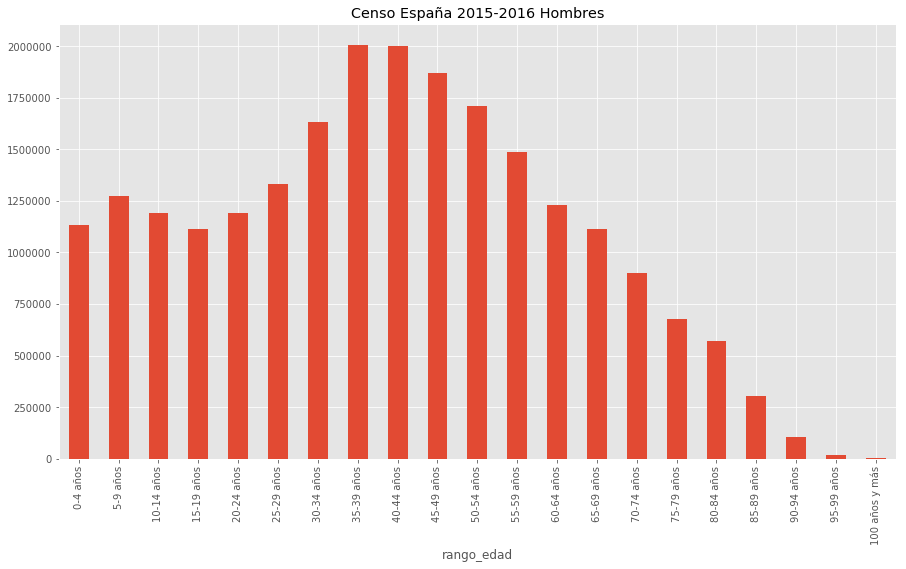

In [14]:
df_censo_grouped['Hombres'].plot.bar(figsize=(15, 8), title='Censo España 2015-2016 Hombres')

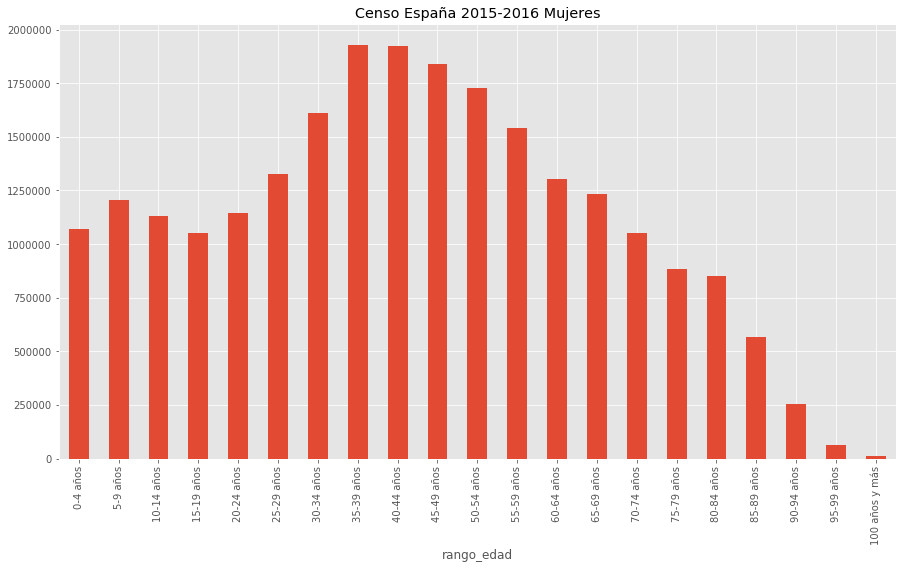

In [15]:
df_censo_grouped['Mujeres'].plot.bar(figsize=(15, 8), title='Censo España 2015-2016 Mujeres')

# Conclusión

A falta de afinar este estudio, se puede sacar como primera conclusión que no parece que haya ninguna razón para preocuparse: las muertes por asesinato de mujeres por debajo de los 20 años son muy infrecuentes, de hecho mucho menos frecuentes que las muertes por encima de esa edad. 

Es bastante más probable que mueras de forma violenta a partir de los 20 que antes. Y sobre todo, es mucho más probable morir de forma violenta si eres hombre.

Aún así, tengo que decir, que a Lucía no la dejo ir sola por la calle **ni de coña**